<a href="https://colab.research.google.com/github/marcoosnt1/Portifolio_Data_Science/blob/main/Classificando_reviews_atraves_de_text_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução
Este projeto irá analisar os dados do site yelp através de técnicas de nlp.O principal objetivo deste projeto, será tentar prever as estrelas recebidas  por um produto, através do comentário escrito no review. Apesar deste site possuir reviews de 1 a 5 estrelas, iremos dividir o dataset entre reviews de 1 ou 5 estrelas, para simplificar o processo.



## 1.Importando os dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/yelp.csv')

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [4]:
df['tamanho'] = df['text'].apply(len)

In [ ]:
df['tamanho'].head()

0     889
1    1345
2      76
3     419
4     469
Name: tamanho, dtype: int64

## 2.Analise exploratória dos dados

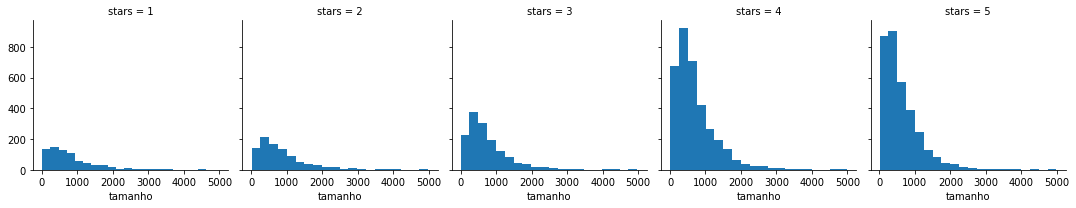

In [ ]:
#criando um facet grid com 5 histogramas de comprimento de texto com base  na classificação das estrelas
g= sns.FacetGrid(df,col='stars')
g.map(plt.hist,'tamanho',bins=20)

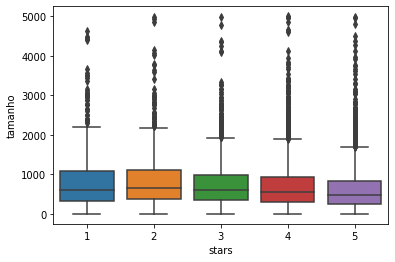

In [ ]:
#boxplot de comprimento do texto para cada categoria de estrelas 
sns.boxplot(x='stars',y='tamanho', data = df)

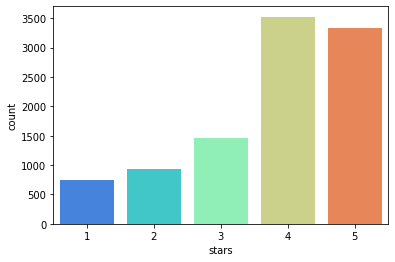

In [ ]:
#countplot  para numero de ocorrencia  de cada quantidade de estrelas 
sns.countplot(x='stars',data=df,palette= 'rainbow')

In [ ]:
#pegando os valores medios para cada coluna numerica
stars = df.groupby('stars').mean()

In [ ]:
stars

,cool,useful,funny,tamanho
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


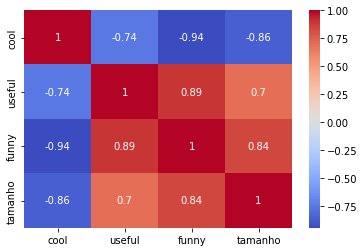

In [ ]:
#criando um heatmap
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## 3.Pré processamento

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
#criando um dataframe que contenha as colunas de dados do dataframe apenas para reviews 
# de uma ou cinco estrelas 
df_class = df[(df.stars == 1) | (df.stars == 5) ] 

In [7]:
df_class['stars']

0       5
1       5
3       5
4       5
6       5
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64

In [ ]:
df_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

## 4.Treinando o modelo com Naibe bayes

In [24]:
# criando x e y  para texto e stars  do df _class
x = df_class['text']
y = df_class['stars']

In [25]:
vec = CountVectorizer()

In [26]:
x = vec.fit_transform(x)

In [27]:
print(x)

  (0, 11265)	2
  (0, 18735)	1
  (0, 17406)	1
  (0, 10635)	1
  (0, 8161)	2
  (0, 11821)	3
  (0, 1984)	1
  (0, 6864)	1
  (0, 2364)	1
  (0, 937)	8
  (0, 9114)	9
  (0, 18517)	8
  (0, 6123)	3
  (0, 17126)	10
  (0, 18585)	1
  (0, 12505)	1
  (0, 18672)	1
  (0, 10300)	2
  (0, 15422)	1
  (0, 12016)	1
  (0, 12054)	1
  (0, 17134)	4
  (0, 7715)	1
  (0, 921)	1
  (0, 407)	1
  :	:
  (4085, 9817)	1
  (4085, 10088)	1
  (4085, 9127)	1
  (4085, 10873)	1
  (4085, 2154)	1
  (4085, 183)	1
  (4085, 10907)	1
  (4085, 17416)	1
  (4085, 6370)	1
  (4085, 3314)	1
  (4085, 3329)	1
  (4085, 14423)	1
  (4085, 1442)	1
  (4085, 16134)	1
  (4085, 15944)	1
  (4085, 6651)	1
  (4085, 12298)	1
  (4085, 543)	1
  (4085, 17700)	1
  (4085, 2515)	1
  (4085, 189)	1
  (4085, 9624)	1
  (4085, 5510)	1
  (4085, 836)	1
  (4085, 15962)	1


In [28]:
#dividindo entre treino e teste 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=101)

In [29]:
nb = MultinomialNB() # criando o objeto

In [30]:
#fitando nb com os dados de treino 
nb.fit(x_train,y_train)

MultinomialNB()

In [31]:
#fazendo as previsões com x_test
pred =  nb.predict(x_test)

In [ ]:
# verificando accuracia
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## 5.Treinando o modelo usando o tfidftransformer

In [18]:
#importando a biblioteca
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [23]:
#criando a pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classificador',MultinomialNB()),
])


In [32]:
#refazendo a divisão entre treino  e teste
x = df_class['text']
y = df_class['stars']

In [33]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=101)

In [34]:
#usando a pipeline para retreinar o  modelo
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('Classificador', MultinomialNB())])

In [35]:
#fazendo previsões com   o modelo
pred = pipeline.predict(x_test)

In [36]:
#accuracia
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusão

A partir dos resultados gerados através do classification report, podemos notar que o modelo de naive bayes sem o uso de ferramentas de nlp , obteve uma melhor performance do que os modelos que se utilizam  de ferramentas especificas para o processamento de linguagem natural, como o TfidfTransformer, por exemplo. Isto demonstra que modelos muito complexos, as vezes pode não ser o modelo mais eficiente para a obtenção de melhores resultados.